In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
f = 20 

data = pd.DataFrame()
data['n'] = np.arange(0,261,20)
data['D_ge (mm)'] = pd.Series([27.30, 27.19, 27.08, 26.97, 26.85,
                    26.73, 26.62, 26.51, 26.39, 26.23, 26.16, 26.04,
                    25.92, 25.80]).reindex(data.index)

data['D_gc (mm)'] = pd.Series([25.50, 25.66, 25.78, 25.89, 26.01, 26.13, 26.24, 26.35,
                 26.47, 26.60, 26.71, 26.83]).reindex(data.index)



data['ΔD_ge (mm)'] = data.loc[0,'D_ge (mm)'] - data['D_ge (mm)']
data['ΔD_gc (mm)'] = - data.loc[0,'D_gc (mm)'] + data['D_gc (mm)']

N, _ = data.shape
data = data.drop(index=0)

data

,n,D_ge (mm),D_gc (mm),ΔD_ge (mm),ΔD_gc (mm)
1,20,27.19,25.66,0.11,0.16
2,40,27.08,25.78,0.22,0.28
3,60,26.97,25.89,0.33,0.39
4,80,26.85,26.01,0.45,0.51
5,100,26.73,26.13,0.57,0.63
6,120,26.62,26.24,0.68,0.74
7,140,26.51,26.35,0.79,0.85
8,160,26.39,26.47,0.91,0.97
9,180,26.23,26.60,1.07,1.10
10,200,26.16,26.71,1.14,1.21


λ_e = 574 nm
λ_c = 611 nm


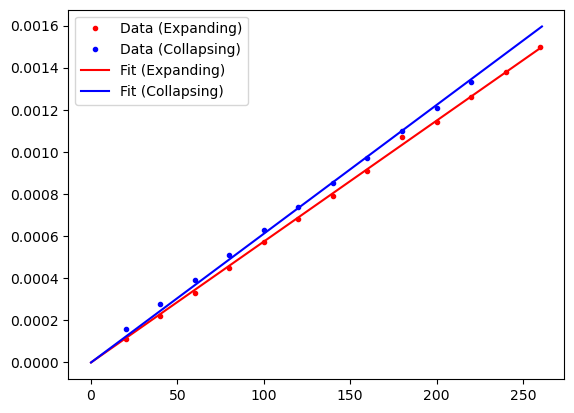

[6.11264822e-07]
[[2.23894291e-17]]


In [3]:
%matplotlib inline

data_e = data[['n', 'ΔD_ge (mm)']].dropna()
data_c = data[['n', 'ΔD_gc (mm)']].dropna()

x_ge = data_e['n'].to_numpy()
y_ge = data_e['ΔD_ge (mm)'].to_numpy()*1e-3

x_gc = data_c['n'].to_numpy()
y_gc = data_c['ΔD_gc (mm)'].to_numpy()*1e-3

def formula(n,λ):
    return 0.5*f*λ*n

para, para_cov = curve_fit(formula, x_ge, y_ge, [600e-9])
λ_e = para[0]
print(f'λ_e = {λ_e/1e-9:.0f} nm')

para, para_cov = curve_fit(formula, x_gc, y_gc, [600e-9])
λ_c = para[0]
print(f'λ_c = {λ_c/1e-9:.0f} nm')

#plt.title('A')
plt.plot(x_ge,y_ge,'.', color = "red", label = "Data (Expanding)")
plt.plot(x_gc,y_gc,'.', color = "blue", label = "Data (Collapsing)")

x_reg = np.linspace(0,261,10)
y_reg = formula(x_reg, λ_e)
plt.plot(x_reg,y_reg, '-', color = "red", label = "Fit (Expanding)")
y_reg = formula(x_reg, λ_c)
plt.plot(x_reg,y_reg, '-', color = "blue", label = "Fit (Collapsing)")

plt.legend()
plt.show()
print(para)
print(para_cov)

In [4]:
table = data[['n', 'ΔD_ge (mm)']].rename(columns={'n': 'x', 
                                               'ΔD_ge (mm)':'y'}).dropna()

table['xi^2'] = table['x']**2
table['xiyi'] = table['x']*table['y']

sum_x2 = table['xi^2'].sum()
sum_xy = table['xiyi'].sum()

slope = sum_xy/sum_x2

table['ei'] = table['y'] - slope*table['x']
table['ei^2'] = table['ei']**2

sum_e2 = table['ei^2'].sum()
slope_err = np.sqrt(((1/(N-2))*sum_e2)/sum_x2)

print(f'sum_x2 = {sum_x2}')
print(f'sum_xy = {sum_xy}')
print(f'slope = {slope}, error = {slope_err}')
print(f'sum_e2 = {sum_e2}')

table

sum_x2 = 327600
sum_xy = 1880.6000000000004
slope = 0.005740537240537242, error = 2.390066356783529e-05
sum_e2 = 0.002245665445665377


,x,y,xi^2,xiyi,ei,ei^2
1,20,0.11,400,2.2,-0.004811,0.000023
2,40,0.22,1600,8.8,-0.009621,0.000093
3,60,0.33,3600,19.8,-0.014432,0.000208
4,80,0.45,6400,36.0,-0.009243,0.000085
5,100,0.57,10000,57.0,-0.004054,0.000016
6,120,0.68,14400,81.6,-0.008864,0.000079
7,140,0.79,19600,110.6,-0.013675,0.000187
8,160,0.91,25600,145.6,-0.008486,0.000072
9,180,1.07,32400,192.6,0.036703,0.001347
10,200,1.14,40000,228.0,-0.008107,0.000066


In [5]:
table = data[['n', 'ΔD_gc (mm)']].rename(columns={'n': 'x', 
                                               'ΔD_gc (mm)':'y'}).dropna()

table['xi^2'] = table['x']**2
table['xiyi'] = table['x']*table['y']

sum_x2 = table['xi^2'].sum()
sum_xy = table['xiyi'].sum()

slope = sum_xy/sum_x2

table['ei'] = table['y'] - slope*table['x']
table['ei^2'] = table['ei']**2

sum_e2 = table['ei^2'].sum()
slope_err = np.sqrt(((1/(N-2))*sum_e2)/sum_x2)

print(f'sum_x2 = {sum_x2}')
print(f'sum_xy = {sum_xy}')
print(f'slope = {slope}, error = {slope_err}')
print(f'sum_e2 = {sum_e2}')

table

sum_x2 = 202400
sum_xy = 1237.2
slope = 0.006112648221343874, error = 4.3194742746717903e-05
sum_e2 = 0.0045316205533598415


,x,y,xi^2,xiyi,ei,ei^2
1,20,0.16,400,3.2,0.037747,1.424839e-03
2,40,0.28,1600,11.2,0.035494,1.259829e-03
3,60,0.39,3600,23.4,0.023241,5.401490e-04
4,80,0.51,6400,40.8,0.020988,4.405021e-04
5,100,0.63,10000,63.0,0.018735,3.510069e-04
6,120,0.74,14400,88.8,0.006482,4.201909e-05
7,140,0.85,19600,119.0,-0.005771,3.330157e-05
8,160,0.97,25600,155.2,-0.008024,6.438001e-05
9,180,1.10,32400,198.0,-0.000277,7.655173e-08
10,200,1.21,40000,242.0,-0.012530,1.569920e-04
